## Perceptron and Support Vector Machines

##### This noteboook pertains to work on the text data/NLP. Downloaded the newsgroups data (train and test) using fetch 20newsgroups for categories: ’alt.atheism’, ’comp.graphics’, ’sci.space’ and ’talk.politics.mideast’.  Removed ’headers’, ’footers’ and ’quotes’ from the data. Convert all the words in the text to lower case. Use nltk to get the stopwords list (nltk.corpus.stopwords) and remove the stopwords from the text. Use TfidfVectorizer to obtain the tfidf vectors (after smoothing*) for the train and test data and select only top 2000 features. 
Note : Smoothing the text data is same as computing the idf values after adding a document with all words in the vocabulary.

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import itertools

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from collections import Counter 
from collections import OrderedDict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import laplacian_kernel

import matplotlib.pyplot as plt
%matplotlib inline

#### Obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors.  

In [4]:
catgrs = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
rem = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train',  remove=rem, categories=catgrs)
#len(newsgroups_train)
newsgroups_test = fetch_20newsgroups(subset='test', remove=rem, categories=catgrs)
#len(newsgroups_test)

In [5]:
X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target

sklearn_stop_wrds = text.ENGLISH_STOP_WORDS
print ("Total Stop words are : ", len(sklearn_stop_wrds))

Total Stop words are :  318


In [6]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000, \
                                                                 strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

pla = Perceptron( alpha=0.01)
pla.fit(train_vectors, y_train)
y_pred = pla.predict(test_vectors)
print ('Accuracy using Perceptron model is : {}% '.format(accuracy_score(y_test, y_pred) * 100))

Accuracy using Perceptron model is : 77.60487144790257% 


In [7]:
print ("Average non zero element in Train Vector")
train_vectors.nnz / float(train_vectors.shape[0])

Average non zero element in Train Vector


40.5024763619991

#### Testing accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a perceptron model and plotting the Features Vs Accuracy graph

In [8]:
features = [100, 200, 500, 1000, 1500, 2000, 3000]
accry_data_dict={} 

for f in features:
    vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = f, \
                                 strip_accents = 'ascii')
    train_vectors = vectorizer.fit_transform(X_train)
    test_vectors = vectorizer.transform(X_test)
    
    pla = Perceptron( alpha=0.01)
    pla.fit(train_vectors, y_train)
    y_pred = pla.predict(test_vectors)
    accry_data_dict[f] = (accuracy_score(y_test, y_pred) * 100)

accry_data_dict

{100: 60.893098782138026,
 200: 67.658998646820024,
 500: 73.139377537212454,
 1000: 73.680649526387015,
 1500: 73.951285520974281,
 2000: 77.604871447902568,
 3000: 78.619756427604869}

In [9]:
def plot_graph( data_dict, title='Validation Accuracies', \
               xlbl= 'Top Selected Features#', ylbl='Accuracy'):
#     item_lst = sorted(data_dict.items())
#     x, y = zip(*item_lst)
    x, y = zip(*data_dict.items())
    plt.plot(x, y)
    plt.title(title)
    plt.ylabel(ylbl)
    plt.xlabel(xlbl)
    plt.show()

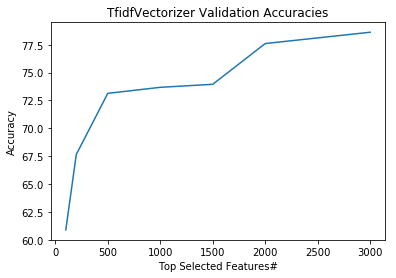

In [10]:
plot_graph(accry_data_dict, title='TfidfVectorizer Validation Accuracies')

####  Using the SVM model to train on the training vectors and compute the accuracy on the test vectors (with Linear kernel) 

In [11]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000, \
                             strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
clf = SVC(kernel='linear')
clf.fit(train_vectors, y_train)
y_pred = clf.predict(test_vectors)
print ('Accuracy using Perceptron model is : {}% '.format(accuracy_score(y_test, y_pred) * 100))

Accuracy using Perceptron model is : 79.43166441136671% 


#### Testing accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a linear SVM model

In [18]:
features = [100, 200, 500, 1000, 1500, 2000, 3000]
svm_accry_dict= OrderedDict() 

for f in features:
    vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = f, \
                                 strip_accents = 'ascii')
    train_vectors = vectorizer.fit_transform(X_train)    
    test_vectors = vectorizer.transform(X_test)
    
    clf = SVC(kernel='linear')
    clf.fit(train_vectors, y_train)
    y_pred = clf.predict(test_vectors)
    svm_accry_dict[f] = (accuracy_score(y_test, y_pred) * 100)

svm_accry_dict

OrderedDict([(100, 65.5615696887686),
             (200, 71.380243572395131),
             (500, 74.560216508795676),
             (1000, 76.792963464140726),
             (1500, 77.740189445196208),
             (2000, 79.431664411366711),
             (3000, 81.461434370771315)])

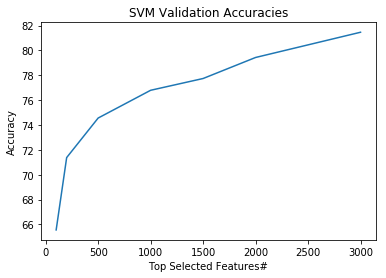

In [19]:
plot_graph(svm_accry_dict, title='SVM Validation Accuracies')

#### Performing 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the cost parameter ’C’ for values 0.01,0.1,1,10,100.

In [20]:
print ("Shape of X_train, X_test : ", len(X_train), len(X_test))
print ("Shape of y_train, y_test : ", len(y_train),  len(y_test))

Shape of X_train, X_test :  2221 1478
Shape of y_train, y_test :  2221 1478


In [21]:
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, \
                                                        test_size=0.2, random_state=10)

In [22]:
for cost in [0.01,0.1,1,10,100]:
    vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000,\
                                 strip_accents = 'ascii')
    train_vectors = vectorizer.fit_transform(X_train_split)    
    val_vectors = vectorizer.transform(X_valid)
    
    clf = SVC(kernel='linear', C=cost)
    clf.fit(train_vectors, y_train_split)
    pred = clf.predict(val_vectors)
    print ('Valid accuracy for C= '+ str(cost) + ' : ' + str(accuracy_score(y_valid, pred)))

Valid accuracy for C= 0.01 : 0.244943820225
Valid accuracy for C= 0.1 : 0.775280898876
Valid accuracy for C= 1 : 0.83595505618
Valid accuracy for C= 10 : 0.811235955056
Valid accuracy for C= 100 : 0.793258426966


In [23]:
# C = 1 selected as best

In [24]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000, \
                             strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

clf = SVC(kernel='linear', C=1)
clf.fit(train_vectors, y_train)
y_pred = clf.predict(test_vectors)
print ('Accuracy using SVC for C=1 model is : {}% '\
                       .format(accuracy_score(y_test, y_pred) * 100))

Accuracy using SVC for C=1 model is : 79.43166441136671% 


#### Train a kernelized SVM (with ’C’=10000) with kernel values - ’poly’ with degree 1, 2, 3, ’rbf’ and ’sigmoid’, and calculaitng best accuracy on validation data.

In [25]:
print ("Shape of X_train, X_test : ", len(X_train), len(X_test))
print ("Shape of y_train, y_test : ", len(y_train),  len(y_test))
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train,\
                                                        test_size=0.2, random_state=10)

print ("Shape of X_train_split, X_valid, X_test : ", len(X_train_split), len(X_valid),\
                                                           len(X_test))
print ("Shape of y_train_split, , y_valid, y_test : ", len(y_train_split), len(y_valid) ,\
                                                           len(y_test))

Shape of X_train, X_test :  2221 1478
Shape of y_train, y_test :  2221 1478
Shape of X_train_split, X_valid, X_test :  1776 445 1478
Shape of y_train_split, , y_valid, y_test :  1776 445 1478


In [26]:
parameters = { 'kernel': ['poly','rbf', 'sigmoid'], 'degree':[1, 2, 3]}
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000, \
                                                     strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train_split)    
val_vectors = vectorizer.transform(X_valid)

sv_clf = SVC(C=10000)
clf = GridSearchCV(sv_clf, parameters, verbose=False, n_jobs=-1)

clf.fit(train_vectors, y_train_split)
pred = clf.predict(val_vectors)
print ('Validation data accuracy : ' + str(accuracy_score(y_valid, pred)))
#clf.get_params()

Validation data accuracy : 0.808988764045


In [28]:
test_vectors = vectorizer.transform(X_test)
pred_test = clf.predict(test_vectors)
print ('Test data accuracy : ' + str(accuracy_score(y_test, pred_test)))

Test data accuracy : 0.778755074425


In [29]:
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

In [30]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000,\
                                                         strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

clf = SVC(kernel='rbf', C=10000)
clf.fit(train_vectors, y_train)
y_pred = clf.predict(test_vectors)
print ('Accuracy using SVC model for Kernel = rbf is : {}% '\
                                   .format(accuracy_score(y_test, y_pred) * 100))

Accuracy using SVC model for Kernel = rbf is : 76.04871447902572% 


#### Using Cosine Similarity and Laplacian Kernel (exp−||x−y||1 ) measures, and calculating the test accuracies using these kernels with SVM

In [31]:
def my_kernel(X,y):
    return cosine_similarity(X,y)   

In [32]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000, \
                                     strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
clf = SVC(kernel=my_kernel)
clf.fit(train_vectors, y_train)
y_pred = clf.predict(test_vectors)
print ('Test Accuracy using Cosine Similarity : {}% '\
                               .format(accuracy_score(y_test, y_pred) * 100))

y_pred_train = clf.predict(train_vectors)
print ('Train Accuracy : {}% '.format(accuracy_score(y_train, y_pred_train) * 100))

Test Accuracy using Cosine Similarity : 78.75507442489851% 
Train Accuracy : 95.61140285071268% 


In [33]:
def myLaplace_kernel(X,y):
    return laplacian_kernel(X,y)  

In [34]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000,\
                                                             strip_accents = 'ascii')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
clf = SVC(kernel=myLaplace_kernel)

clf.fit(train_vectors, y_train)
y_pred = clf.predict(test_vectors)
print ('Test Accuracy using Laplace Kernel : {}% '\
                                       .format(accuracy_score(y_test, y_pred) * 100))
y_pred_train = clf.predict(train_vectors)
print ('Train Accuracy : {}% '.format(accuracy_score(y_train, y_pred_train) * 100))

Test Accuracy using Laplace Kernel : 26.65764546684709% 
Train Accuracy : 26.331582895723933% 


#### Constructing custom kernel as a linear combination of 2 kernels. Let K be a kernel represented as:
K(x, y) = αK1(x, y) + (1 − α)K2(x, y) (0 ≤ α ≤ 1)

In [36]:
vectorizer = TfidfVectorizer(stop_words=sklearn_stop_wrds, max_features = 2000, strip_accents = 'ascii')
X_train = vectorizer.fit_transform(X_train)
X_test  = vectorizer.transform(X_test)

X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train,\
                                                        test_size=0.2, random_state=10)
# print ("\nShape of X_train_split, X_valid, X_test : ", X_train_split.shape[0], X_valid.shape[0], X_test.shape[0])
# print ("Shape of y_train_split, y_valid, y_test : ", len(y_train_split), len(y_valid),len(y_test))

In [37]:
alpha_val = np.arange(0, 1.01, 0.1)

alpha_best = 0
acc_best = 0
for alpha in alpha_val:
    X_train_K = ( (alpha * cosine_similarity(X_train_split))  +  ((1-alpha)* laplacian_kernel(X_train_split)) )
    X_valid_K = ((alpha * cosine_similarity(X_valid,X_train_split)) + (1-alpha) * laplacian_kernel(X_valid,X_train_split))
        
    clf = SVC(kernel='precomputed') 
    clf.fit(X_train_K, y_train_split)
    
    pred = clf.predict(X_valid_K)
    acc = accuracy_score(y_valid, pred)
    print('Validation accuracy for α = ' + str(alpha) + '\tis ' + str(acc))
    if (acc > acc_best):
        alpha_best  = alpha
        acc_best = acc # update optimal alpha with latest values
        
print('Best accuracy is = ' + str(acc_best) + ' for α =' + str(alpha_best))

Validation accuracy for α = 0.0	is 0.243445692884
Validation accuracy for α = 0.1	is 0.814606741573
Validation accuracy for α = 0.2	is 0.859550561798
Validation accuracy for α = 0.3	is 0.880149812734
Validation accuracy for α = 0.4	is 0.876404494382
Validation accuracy for α = 0.5	is 0.876404494382
Validation accuracy for α = 0.6	is 0.880149812734
Validation accuracy for α = 0.7	is 0.874531835206
Validation accuracy for α = 0.8	is 0.874531835206
Validation accuracy for α = 0.9	is 0.878277153558
Validation accuracy for α = 1.0	is 0.878277153558
Best accuracy is = 0.880149812734 for α =0.3


In [40]:
alpha = alpha_best
X_train_K = ( (alpha * cosine_similarity(X_train_split))  +  ((1-alpha)* laplacian_kernel(X_train_split)) )
X_test_K = ((alpha * cosine_similarity(X_test,X_train_split)) + (1-alpha) * laplacian_kernel(X_test,X_train_split))

clf = SVC(kernel='precomputed')  
clf.fit(X_train_K, y_train_split)
Y_pred = clf.predict(X_test_K)

acc_per_alpha = accuracy_score(y_test, Y_pred)
print('Test accuracy α = ' + str(alpha) + '\tis ' + str(acc_per_alpha))

Test accuracy α = 0.3	is 0.799052774019


###  Mercer's condition leads to 
1. Similarity matrix which is Positive -Semi definite.  i.e. semi-positive definite will change the magnittude of Vector (after hitting it or after dot product) while the change in direction will less that 90 degrees.  
2. Also with 0< 'alpha' < 1 will cause the linear combination to converge to minimum as it's Convex function (2nd derivative is positive)
3. For kernel expressed as K(X,y) we find the inner (dot product) of X & y with positive real coefficints and the for infinite term the seriew will converge. 